In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

In [47]:
insurance_claim = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/Finance/main/dataset/Auto%20Insurance%20Claims%20Data/insurance_claims.csv")
insurance_claim

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [48]:
insurance_claim.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [49]:
insurance_claim.shape

(1000, 40)

In [50]:
insurance_claim.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [51]:
insurance_claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [52]:
insurance_claim=insurance_claim.replace("?",np.NaN)
round(100*(insurance_claim.isnull().sum()/len(insurance_claim.index)),2)

months_as_customer               0.0
age                              0.0
policy_number                    0.0
policy_bind_date                 0.0
policy_state                     0.0
policy_csl                       0.0
policy_deductable                0.0
policy_annual_premium            0.0
umbrella_limit                   0.0
insured_zip                      0.0
insured_sex                      0.0
insured_education_level          0.0
insured_occupation               0.0
insured_hobbies                  0.0
insured_relationship             0.0
capital-gains                    0.0
capital-loss                     0.0
incident_date                    0.0
incident_type                    0.0
collision_type                  17.8
incident_severity                0.0
authorities_contacted            0.0
incident_state                   0.0
incident_city                    0.0
incident_location                0.0
incident_hour_of_the_day         0.0
number_of_vehicles_involved      0.0
p

In [53]:
insurance_claim.drop(["_c39"],axis=1,inplace=True)
round(100*(insurance_claim['collision_type'].value_counts(normalize=True,dropna=False)),2)

Rear Collision     29.2
Side Collision     27.6
Front Collision    25.4
NaN                17.8
Name: collision_type, dtype: float64

In [54]:
insurance_claim['collision_type']=insurance_claim['collision_type'].fillna(insurance_claim['collision_type'].mode()[0])

round(100*(insurance_claim['property_damage'].value_counts(normalize=True,dropna=False)),2)

NaN    36.0
NO     33.8
YES    30.2
Name: property_damage, dtype: float64

In [55]:
insurance_claim['property_damage']=insurance_claim['property_damage'].fillna("NO")

round(100*(insurance_claim['police_report_available'].value_counts(normalize=True,dropna=False)),2)

NaN    34.3
NO     34.3
YES    31.4
Name: police_report_available, dtype: float64

In [56]:
insurance_claim['police_report_available']=insurance_claim['property_damage'].fillna("NO")

round(100*(insurance_claim.isnull().sum()/len(insurance_claim.index)),2)

months_as_customer             0.0
age                            0.0
policy_number                  0.0
policy_bind_date               0.0
policy_state                   0.0
policy_csl                     0.0
policy_deductable              0.0
policy_annual_premium          0.0
umbrella_limit                 0.0
insured_zip                    0.0
insured_sex                    0.0
insured_education_level        0.0
insured_occupation             0.0
insured_hobbies                0.0
insured_relationship           0.0
capital-gains                  0.0
capital-loss                   0.0
incident_date                  0.0
incident_type                  0.0
collision_type                 0.0
incident_severity              0.0
authorities_contacted          0.0
incident_state                 0.0
incident_city                  0.0
incident_location              0.0
incident_hour_of_the_day       0.0
number_of_vehicles_involved    0.0
property_damage                0.0
bodily_injuries     

In [57]:
insurance_claim.drop(["incident_hour_of_the_day",'insured_zip','policy_bind_date','incident_location'],axis=1,inplace=True)

In [58]:
insurance_claim.shape

(1000, 35)

In [59]:
insurance_claim.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
number_of_vehicles_involved       4
property_damage                   2
bodily_injuries                   3
witnesses                         4
police_report_available           2
total_claim_amount          

In [60]:
insurance_claim[insurance_claim['total_claim_amount'] != insurance_claim['injury_claim']+insurance_claim['property_claim']+insurance_claim['vehicle_claim']].shape[0]

0

In [61]:
print(insurance_claim[insurance_claim['months_as_customer']<0].shape[0])
print(insurance_claim[insurance_claim['age']<0].shape[0])
print(insurance_claim[insurance_claim['policy_annual_premium']<0].shape[0])
print(insurance_claim[insurance_claim['total_claim_amount']<0].shape[0])
print(insurance_claim[insurance_claim['umbrella_limit']<0].shape[0])
print(insurance_claim[insurance_claim['capital-gains']<0].shape[0])
print(insurance_claim[insurance_claim['number_of_vehicles_involved']<0].shape[0])
print(insurance_claim[insurance_claim['injury_claim']<0].shape[0])
print(insurance_claim[insurance_claim['property_claim']<0].shape[0])
print(insurance_claim[insurance_claim['vehicle_claim']<0].shape[0])

0
0
0
0
1
0
0
0
0
0


In [62]:
insurance_claim.drop(insurance_claim.index[290],inplace=True)

In [63]:
print(insurance_claim[insurance_claim['umbrella_limit']<0].shape[0])

0


In [64]:
insurance_claim.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries                  int64
witnesses                

In [65]:
insurance_claim['incident_date']=pd.to_datetime(insurance_claim['incident_date'],format='%Y-%m-%d')

insurance_claim['auto_year']=pd.to_datetime(insurance_claim['auto_year'],format='%Y')

In [66]:
insurance_claim.dtypes

months_as_customer                      int64
age                                     int64
policy_number                           int64
policy_state                           object
policy_csl                             object
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_sex                            object
insured_education_level                object
insured_occupation                     object
insured_hobbies                        object
insured_relationship                   object
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                          object
collision_type                         object
incident_severity                      object
authorities_contacted                  object
incident_state                         object
incident_city                     

In [67]:
insurance_claim.describe().columns.to_list()

['months_as_customer',
 'age',
 'policy_number',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'capital-gains',
 'capital-loss',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim']

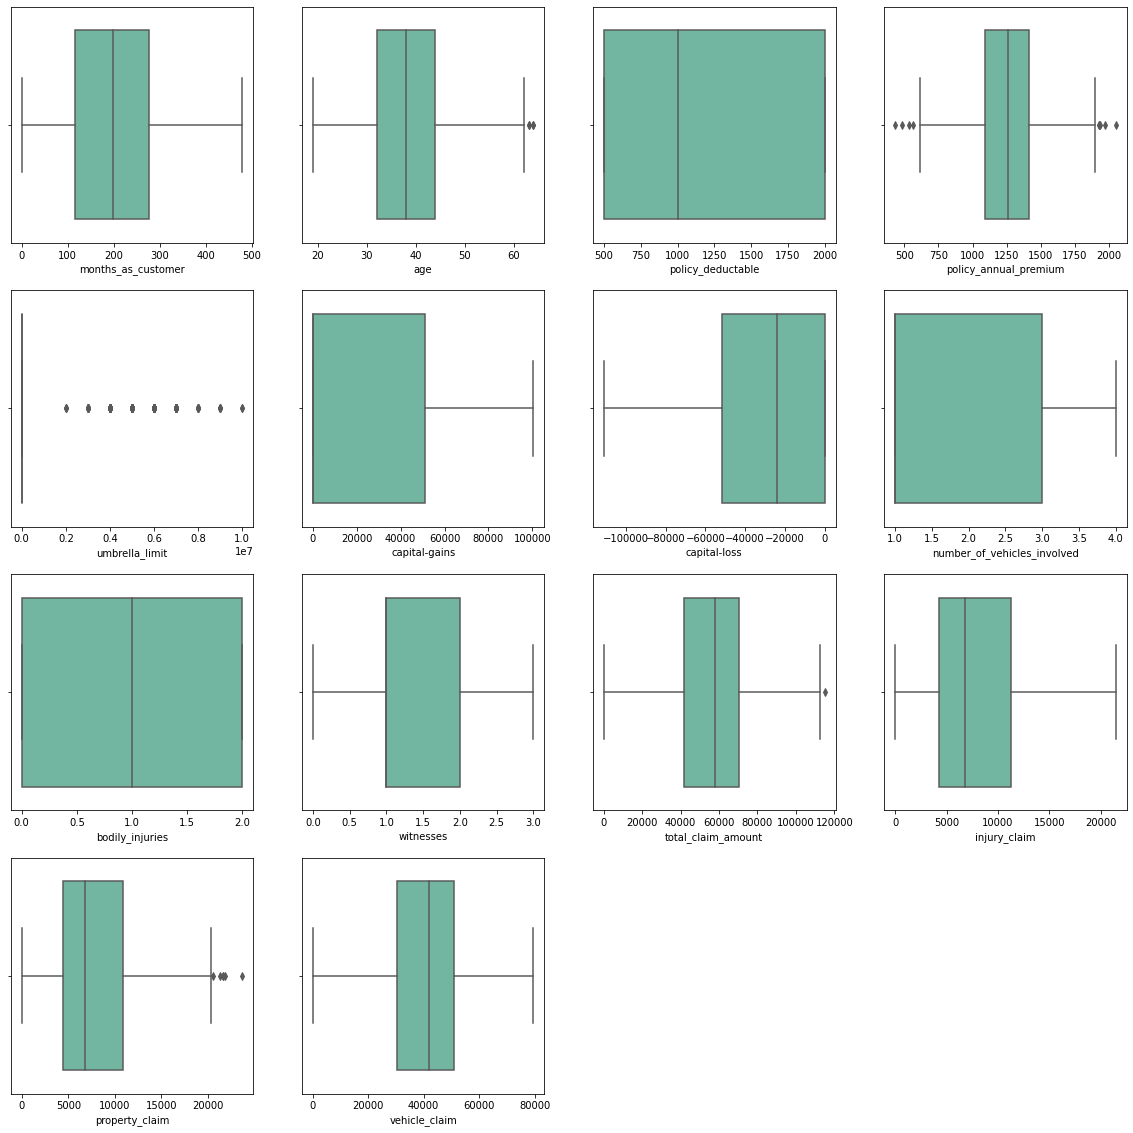

In [68]:
plt.figure(figsize=[20,20])


num_col= ['months_as_customer','age','policy_deductable','policy_annual_premium','umbrella_limit','capital-gains','capital-loss','number_of_vehicles_involved','bodily_injuries','witnesses','total_claim_amount','injury_claim','property_claim','vehicle_claim']

c=1

for i in num_col:
    plt.subplot(4, 4, c)
    plt.xlabel(i)
    sns.boxplot(insurance_claim[i] , palette="Set2")
    c = c + 1
    
plt.show()

In [69]:
insurance_claim['police_report_available'].value_counts(normalize=True,dropna=False)

NO     0.698699
YES    0.301301
Name: police_report_available, dtype: float64

In [70]:
insurance_claim["count"]=1

In [71]:
fig = px.pie(insurance_claim,names='fraud_reported')
fig.show()

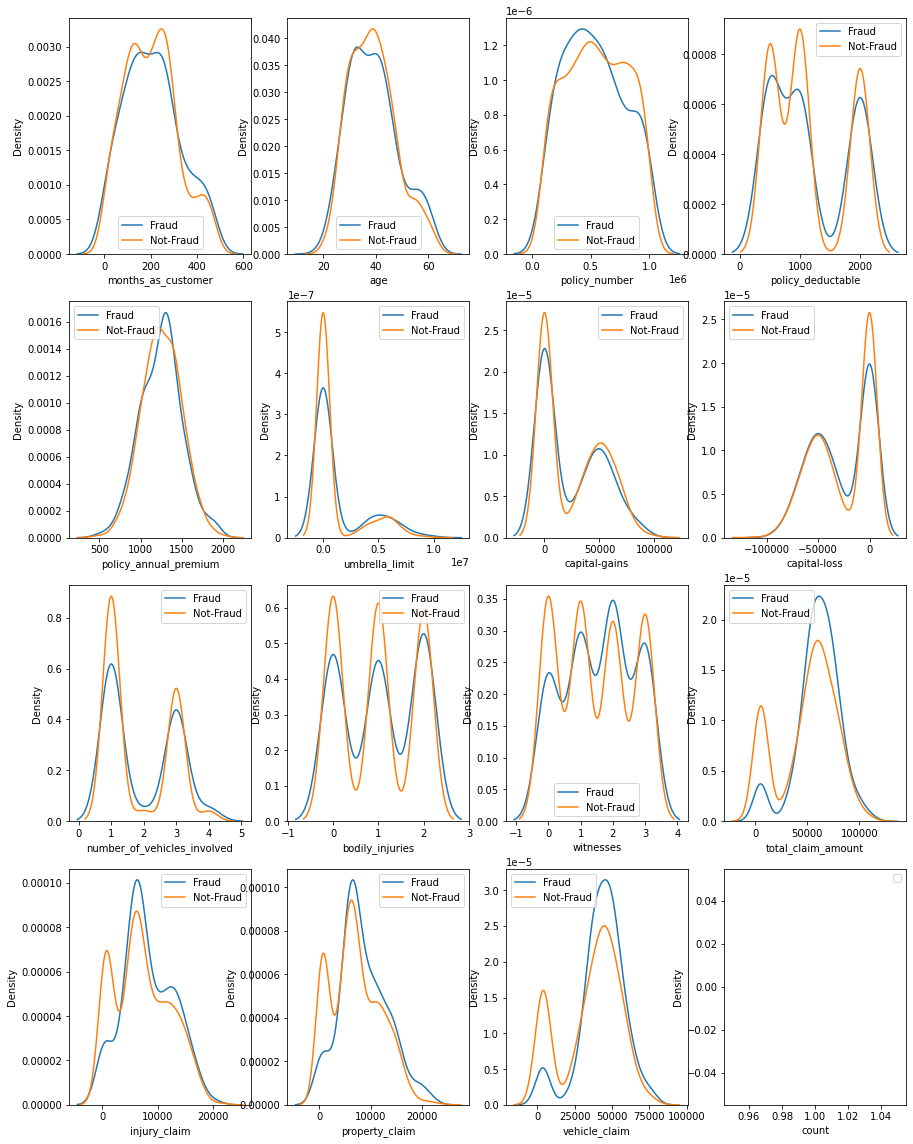

,insured_sex,fraud_reported,count
0,FEMALE,N,411
1,FEMALE,Y,126
2,MALE,N,341
3,MALE,Y,121


In [72]:

insurance_claim_f=insurance_claim[insurance_claim['fraud_reported']=='Y']
insurance_claim_nf=insurance_claim[insurance_claim['fraud_reported']=='N']
plt.figure(figsize=[15,20])
num_col=insurance_claim.describe().columns.to_list()

c=1

for i in num_col:
    plt.subplot(4, 4, c)
    sns.distplot(insurance_claim_f[i],hist=False,label='Fraud')
    sns.distplot(insurance_claim_nf[i],hist=False,label='Not-Fraud')
    c = c + 1
    plt.legend()    
plt.show()

fig = px.box(insurance_claim, x="policy_state", y="total_claim_amount", color="fraud_reported")
fig.show()
fig=px.scatter(insurance_claim,x='policy_annual_premium',y='total_claim_amount',color='fraud_reported',marginal_x='histogram',marginal_y='histogram',trendline='ols')
fig.show()
fig=px.scatter(insurance_claim,x='policy_annual_premium',y='property_claim',color='fraud_reported')
fig.show()
fig=px.scatter(insurance_claim,x='policy_annual_premium',y='vehicle_claim',color='fraud_reported')
fig.show()
fig=px.scatter(insurance_claim,x='policy_annual_premium',y='injury_claim',color='fraud_reported')
fig.show()
fig=px.scatter(insurance_claim,x='age',y='total_claim_amount',color='fraud_reported',marginal_x='box',marginal_y='violin',trendline='ols')
fig.show()
groupdf_is=insurance_claim.groupby(by=['insured_sex','fraud_reported']).count()
groupdf_is.reset_index(inplace=True)
groupdf_is=groupdf_is[['insured_sex','fraud_reported','count']]
groupdf_is.head()

In [73]:
fig=px.bar(groupdf_is,x='insured_sex',y='count',color='fraud_reported',text='count',pattern_shape_sequence=['|','/'],pattern_shape='fraud_reported')
fig.show()

In [74]:
groupdf_uu=insurance_claim.groupby(by=['umbrella_limit','fraud_reported']).count()
groupdf_uu.reset_index(inplace=True)
groupdf_uu=groupdf_uu[['umbrella_limit','fraud_reported','count']]
groupdf_uu.head(3)

,umbrella_limit,fraud_reported,count
0,0,N,611
1,0,Y,187
2,2000000,N,1


In [75]:
fig=px.bar(groupdf_uu,x='umbrella_limit',y='count',color='fraud_reported',text='count')
fig.show()

In [76]:
groupdf_el=insurance_claim.groupby(by=['insured_education_level','fraud_reported']).count()
groupdf_el.reset_index(inplace=True)
groupdf_el=groupdf_el[['insured_education_level','fraud_reported','count']]
groupdf_el.head()

,insured_education_level,fraud_reported,count
0,Associate,N,110
1,Associate,Y,34
2,College,N,90
3,College,Y,32
4,High School,N,124


In [77]:
fig=px.bar(groupdf_el,x='insured_education_level',y='count',color='fraud_reported',text='count',title="Insurance Claim for different education Level")
fig.show()

In [78]:
groupdf_ic=insurance_claim.groupby(by=['insured_occupation','fraud_reported']).count()
groupdf_ic.reset_index(inplace=True)
groupdf_ic=groupdf_ic[['insured_occupation','fraud_reported','count']]
groupdf_ic.head()

,insured_occupation,fraud_reported,count
0,adm-clerical,N,54
1,adm-clerical,Y,11
2,armed-forces,N,52
3,armed-forces,Y,17
4,craft-repair,N,52


In [79]:
fig=px.bar(groupdf_ic,x='insured_occupation',y='count',color='fraud_reported',text='count',title='Number of Claims diffrent Occupation')
fig.show()

In [80]:
groupdf_h=insurance_claim.groupby(by=['insured_hobbies','fraud_reported']).count()
groupdf_h.reset_index(inplace=True)
groupdf_h=groupdf_h[['insured_hobbies','fraud_reported','count']]
groupdf_h.head()

,insured_hobbies,fraud_reported,count
0,base-jumping,N,36
1,base-jumping,Y,13
2,basketball,N,28
3,basketball,Y,6
4,board-games,N,34


In [81]:
fig=px.bar(groupdf_h,x='insured_hobbies',y='count',color='fraud_reported',text='count',title="Hobby Wise claim")
fig.show()

In [82]:
groupdf_rl=insurance_claim.groupby(by=['insured_relationship','fraud_reported']).count()
groupdf_rl.reset_index(inplace=True)
groupdf_rl=groupdf_rl[['insured_relationship','fraud_reported','count']]
groupdf_rl.head()

,insured_relationship,fraud_reported,count
0,husband,N,135
1,husband,Y,35
2,not-in-family,N,129
3,not-in-family,Y,45
4,other-relative,N,125


In [83]:
fig=px.bar(groupdf_rl,x='insured_relationship',y='count',color='fraud_reported',text='count')
fig.show()

In [84]:
groupdf_it=insurance_claim.groupby(by=['incident_type','fraud_reported']).count()
groupdf_it.reset_index(inplace=True)
groupdf_it=groupdf_it[['incident_type','fraud_reported','count']]
groupdf_it.head()

,incident_type,fraud_reported,count
0,Multi-vehicle Collision,N,305
1,Multi-vehicle Collision,Y,114
2,Parked Car,N,76
3,Parked Car,Y,8
4,Single Vehicle Collision,N,285


In [85]:
fig=px.bar(groupdf_it,x='incident_type',y='count',color='fraud_reported',text='count',title="Number of claims Vs. Incident type")
fig.show()

In [86]:
groupdf_ct=insurance_claim.groupby(by=['collision_type','fraud_reported']).count()
groupdf_ct.reset_index(inplace=True)
groupdf_ct=groupdf_ct[['collision_type','fraud_reported','count']]
groupdf_ct.head()

,collision_type,fraud_reported,count
0,Front Collision,N,184
1,Front Collision,Y,70
2,Rear Collision,N,363
3,Rear Collision,Y,107
4,Side Collision,N,205


In [87]:
fig=px.bar(groupdf_ct,x='collision_type',y='count',color='fraud_reported',text='count',title="Nos. of Claim for different type of collision")
fig.show()

In [88]:
groupdf_ins=insurance_claim.groupby(by=['incident_severity','fraud_reported']).count()
groupdf_ins.reset_index(inplace=True)
groupdf_ins=groupdf_ins[['incident_severity','fraud_reported','count']]
groupdf_ins.head()

,incident_severity,fraud_reported,count
0,Major Damage,N,108
1,Major Damage,Y,167
2,Minor Damage,N,316
3,Minor Damage,Y,38
4,Total Loss,N,244


In [89]:
fig=px.bar(groupdf_ins,x='incident_severity',y='count',color='fraud_reported',text='count',title="Number of claim Vs. Incident severity")
fig.show()

In [90]:
groupdf_ac=insurance_claim.groupby(by=['authorities_contacted','fraud_reported']).count()
groupdf_ac.reset_index(inplace=True)
groupdf_ac=groupdf_ac[['authorities_contacted','fraud_reported','count']]
groupdf_ac.head()

,authorities_contacted,fraud_reported,count
0,Ambulance,N,138
1,Ambulance,Y,57
2,Fire,N,163
3,Fire,Y,60
4,None,N,85


In [91]:
fig=px.bar(groupdf_ac,x='authorities_contacted',y='count',color='fraud_reported',text='count')
fig.show()

In [92]:
groupdf_st=insurance_claim.groupby(by=['incident_state','fraud_reported']).count()
groupdf_st.reset_index(inplace=True)
groupdf_st=groupdf_st[['incident_state','fraud_reported','count']]
groupdf_st.head()

,incident_state,fraud_reported,count
0,NC,N,75
1,NC,Y,34
2,NY,N,204
3,NY,Y,58
4,OH,N,13


In [93]:
fig=px.bar(groupdf_st,x='incident_state',y='count',color='fraud_reported',text='count',title="Claims for different state")
fig.show()

In [94]:
fig=px.bar(groupdf_st,x='incident_state',y='count',color='fraud_reported',text='count',title="Claims for different state")
fig.show()

In [95]:
groupdf_pd=insurance_claim.groupby(by=['property_damage','fraud_reported']).count()
groupdf_pd.reset_index(inplace=True)
groupdf_pd=groupdf_pd[['property_damage','fraud_reported','count']]
groupdf_pd.head()

,property_damage,fraud_reported,count
0,NO,N,529
1,NO,Y,169
2,YES,N,223
3,YES,Y,78


In [96]:
fig=px.bar(groupdf_pd,x='property_damage',y='count',color='fraud_reported',text='count')
fig.show()

In [97]:
groupdf_w=insurance_claim.groupby(by=['witnesses','fraud_reported']).count()
groupdf_w.reset_index(inplace=True)
groupdf_w=groupdf_w[['witnesses','fraud_reported','count']]
groupdf_w.head()

,witnesses,fraud_reported,count
0,0,N,199
1,0,Y,50
2,1,N,194
3,1,Y,63
4,2,N,176


In [98]:
fig=px.bar(groupdf_w,x='witnesses',y='count',color='fraud_reported',text='count',title="Nos. of claims vs No. of witnesses")
fig.show()
groupdf_am=insurance_claim.groupby(by=['auto_make','fraud_reported']).count()
groupdf_am.reset_index(inplace=True)
groupdf_am=groupdf_am[['auto_make','fraud_reported','count']]
groupdf_am.head()

,auto_make,fraud_reported,count
0,Accura,N,55
1,Accura,Y,13
2,Audi,N,48
3,Audi,Y,21
4,BMW,N,52


In [99]:
fig=px.bar(groupdf_am,x='auto_make',y='count',color='fraud_reported',text='count',title="Claims for different auto make")
fig.show()

In [100]:
groupdf_atm=insurance_claim.groupby(by=['auto_model','fraud_reported']).count()
groupdf_atm.reset_index(inplace=True)
groupdf_atm=groupdf_atm[['auto_model','fraud_reported','count']]
groupdf_atm.head()

,auto_model,fraud_reported,count
0,3 Series,N,17
1,3 Series,Y,1
2,92x,N,20
3,92x,Y,8
4,93,N,20


In [101]:
fig=px.bar(groupdf_atm,x='auto_model',y='count',color='fraud_reported',text='count',title="Claims for diiferent auto model")
fig.show()
groupdf_atmm=insurance_claim.groupby(by=['auto_make','auto_model','fraud_reported']).count()
groupdf_atmm.reset_index(inplace=True)
groupdf_atmm=groupdf_atmm[['auto_make','auto_model','fraud_reported','count']]
groupdf_atmm['fraud_reported']=groupdf_atmm['fraud_reported'].apply(lambda x: 'Fraud Reported :YES' if x == 'Y' else 'Fraud Reported :NO')
groupdf_atmm.head()

,auto_make,auto_model,fraud_reported,count
0,Accura,MDX,Fraud Reported :NO,28
1,Accura,MDX,Fraud Reported :YES,8
2,Accura,RSX,Fraud Reported :NO,11
3,Accura,RSX,Fraud Reported :YES,1
4,Accura,TL,Fraud Reported :NO,16


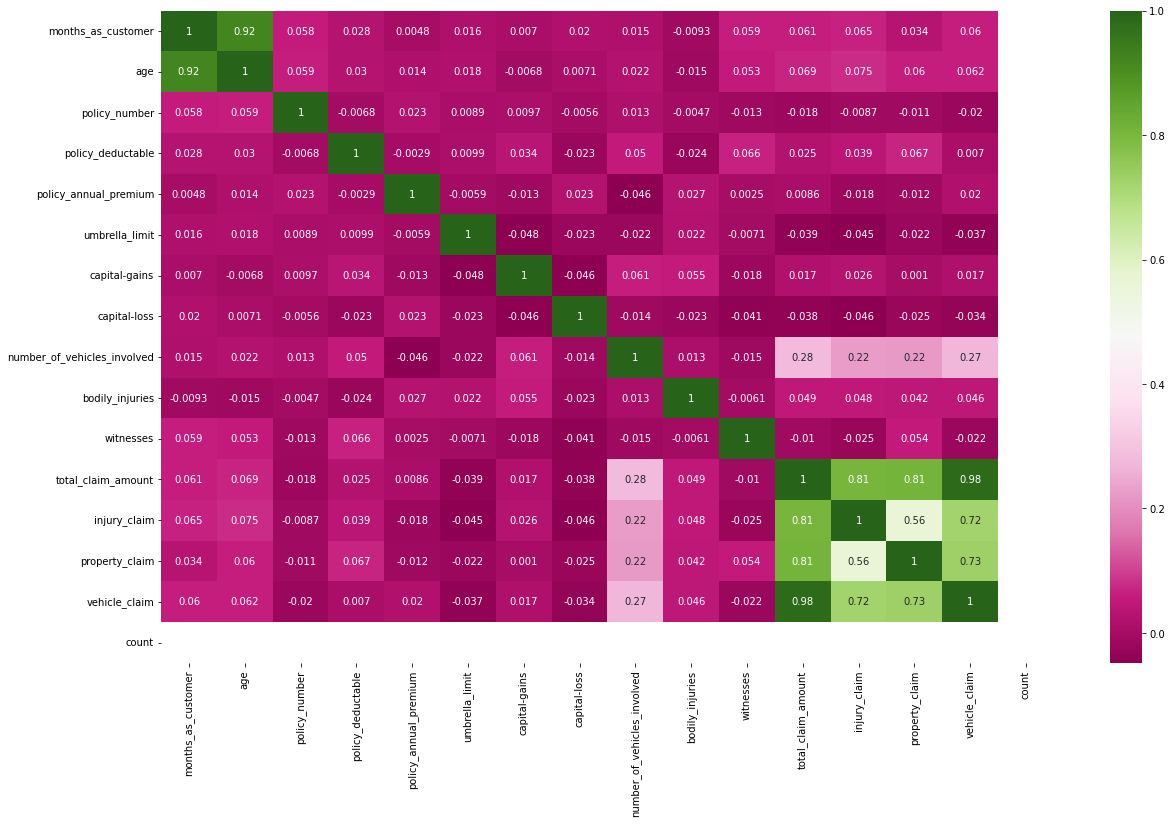

<Figure size 1440x1080 with 0 Axes>

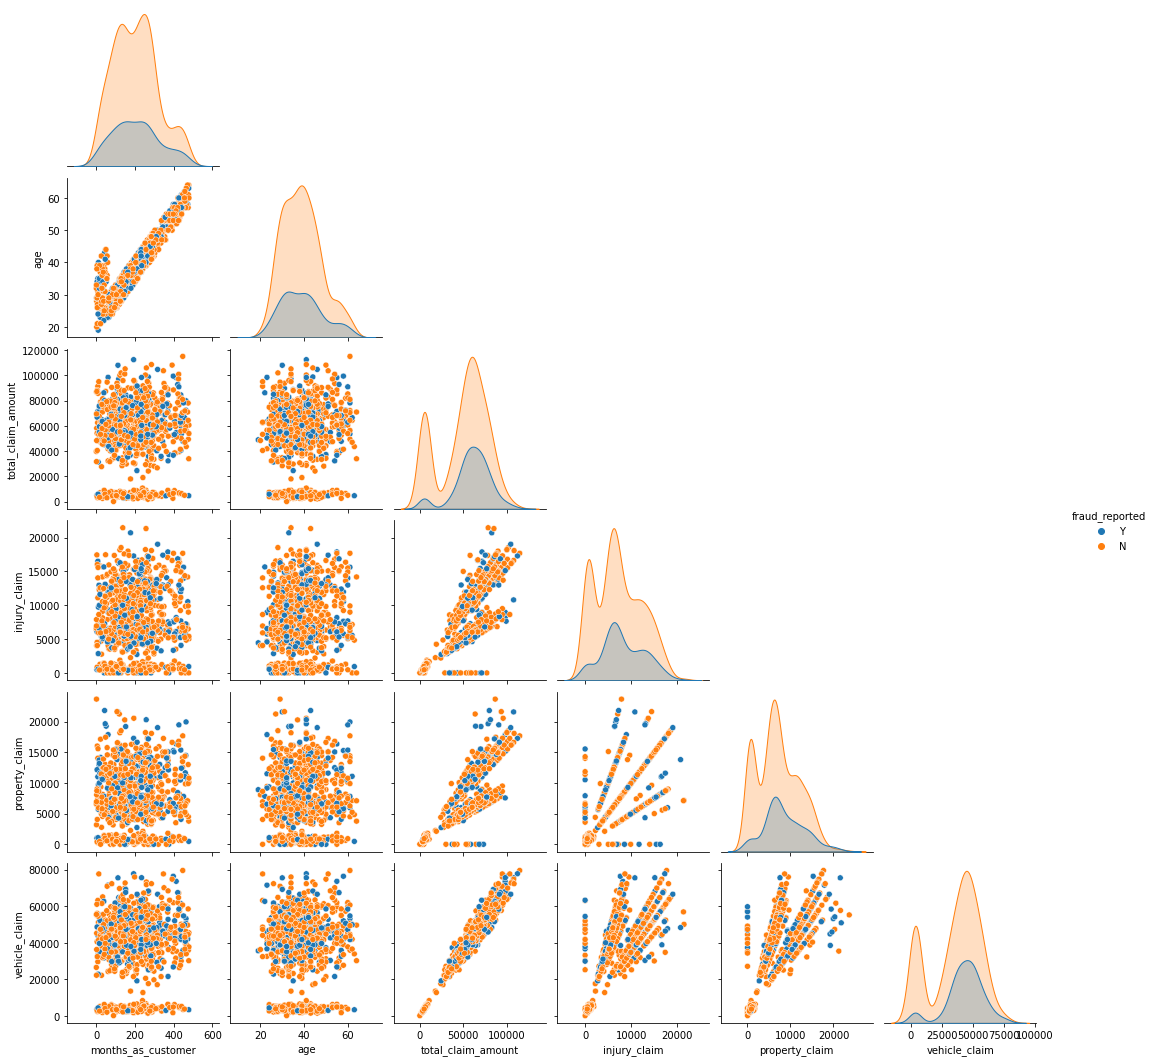

In [102]:
fig=px.bar(groupdf_atmm,x='auto_make',y='count',color='auto_model',text='count',hover_name='fraud_reported',title="Claims by Auto make amd Auto model")
fig.show()
plt.figure(figsize=[20,12])
sns.heatmap(insurance_claim.corr(),annot=True,cmap="PiYG")
plt.show()


plt.figure(figsize=[20,15])

corr_df=insurance_claim[['months_as_customer', 'age','total_claim_amount', 'injury_claim','property_claim', 'vehicle_claim','fraud_reported']]
sns.pairplot(corr_df,hue='fraud_reported',corner=True)
plt.show()

In [103]:
fig=px.box(insurance_claim,x='insured_sex',y='total_claim_amount',color='fraud_reported',notched=True,template='plotly_dark')
fig.show()

In [104]:
fig=px.box(insurance_claim,x='insured_education_level',y='total_claim_amount',color='fraud_reported',notched=True,template='plotly_dark')
fig.show()
fig

In [105]:
fig=px.box(insurance_claim,x='insured_occupation',y='total_claim_amount',color='fraud_reported',notched=True,template='plotly_dark')
fig.show()
fig=px.box(insurance_claim,x='insured_hobbies',y='total_claim_amount',color='fraud_reported',notched=True,template='plotly_dark')
fig.show()
fig=px.box(insurance_claim,x='incident_type',y='total_claim_amount',color='fraud_reported',notched=True,template='plotly_dark')
fig.show()
fig=px.box(insurance_claim,x='incident_severity',y='total_claim_amount',color='fraud_reported',notched=True,template='plotly_dark')
fig.show()
fig=px.box(insurance_claim,x='number_of_vehicles_involved',y='total_claim_amount',color='fraud_reported',notched=True,template='plotly_dark')
fig.show()
fig=px.box(insurance_claim,x='bodily_injuries',y='total_claim_amount',color='fraud_reported',notched=True,template='plotly_dark')
fig.show()
fig=px.box(insurance_claim,x='auto_make',y='total_claim_amount',color='fraud_reported',notched=True,template='plotly_dark')
fig.show()
fig=px.box(insurance_claim,x='auto_model',y='total_claim_amount',color='fraud_reported',notched=False,template='plotly_dark')
fig.show()
fig=px.box(insurance_claim,x='auto_year',y='total_claim_amount',color='fraud_reported',notched=False,template='plotly_dark')
fig.show()
fig=px.box(insurance_claim,x='fraud_reported',y='total_claim_amount',notched=True,template='plotly_dark',points='all')
fig.show()
fig=px.box(insurance_claim,x='fraud_reported',y='vehicle_claim',notched=True,template='plotly_dark',points='all')
fig.show()
fig=px.box(insurance_claim,x='fraud_reported',y='total_claim_amount',color='insured_education_level',notched=True,template='plotly_dark')
fig.show()
fig=px.box(insurance_claim,x='fraud_reported',y='total_claim_amount',color='insured_occupation',notched=True,template='plotly_dark')
fig.show()

insurance_claim['fraud_flag']=insurance_claim['fraud_reported'].apply(lambda x: 1 if x=='Y' else 0)
grp1=insurance_claim.groupby(['insured_occupation'])['fraud_flag'].mean()
grp1=pd.DataFrame(grp1)
grp1.reset_index(inplace=True)
grp1['fraud_flag']=grp1['fraud_flag'].apply(lambda x: 100*x)
grp1['fraud_flag']=grp1['fraud_flag'].apply(lambda x: round(x,2))
grp1['fraud_flag'] = grp1['fraud_flag'].apply(lambda x: "{}{}".format(x,'%'))
grp1.rename(columns={'fraud_flag':'Fraud percentage'},inplace=True)
grp1.head(10)

,insured_occupation,Fraud percentage
0,adm-clerical,16.92%
1,armed-forces,24.64%
2,craft-repair,29.73%
3,exec-managerial,36.84%
4,farming-fishing,30.19%
5,handlers-cleaners,20.37%
6,machine-op-inspct,23.91%
7,other-service,16.9%
8,priv-house-serv,16.9%
9,prof-specialty,21.18%


In [106]:
fig=px.bar(grp1,x='insured_occupation',y='Fraud percentage',color='insured_occupation',log_y=True,title='Fraud percentage:Occupation wise',text='Fraud percentage')
fig.update_traces(textposition='outside')
fig.show()
grp2=insurance_claim.groupby(['insured_education_level'])['fraud_flag'].mean()
grp2=pd.DataFrame(grp2)
grp2.reset_index(inplace=True)
grp2['fraud_flag']=grp2['fraud_flag'].apply(lambda x: 100*x)
grp2['fraud_flag']=grp2['fraud_flag'].apply(lambda x: round(x,2))
grp2['fraud_flag'] = grp2['fraud_flag'].apply(lambda x: "{}{}".format(x,'%'))
grp2.rename(columns={'fraud_flag':'Fraud percentage'},inplace=True)
grp2.head()

,insured_education_level,Fraud percentage
0,Associate,23.61%
1,College,26.23%
2,High School,22.5%
3,JD,26.09%
4,MD,26.39%


In [107]:
fig=px.bar(grp2,x='insured_education_level',y='Fraud percentage',color='insured_education_level',log_y=True,title='Fraud percentage:Education-Level wise',text='Fraud percentage')
fig.update_traces(textposition='outside')
fig.show()
grp3=insurance_claim.groupby(['insured_sex'])['fraud_flag'].mean()
grp3=pd.DataFrame(grp3)
grp3.reset_index(inplace=True)
grp3['fraud_flag']=grp3['fraud_flag'].apply(lambda x: 100*x)
grp3['fraud_flag']=grp3['fraud_flag'].apply(lambda x: round(x,2))
grp3['fraud_flag'] = grp3['fraud_flag'].apply(lambda x: "{}{}".format(x,'%'))
grp3.rename(columns={'fraud_flag':'Fraud percentage'},inplace=True)
grp3.head()

,insured_sex,Fraud percentage
0,FEMALE,23.46%
1,MALE,26.19%


In [108]:
fig=px.bar(grp3,x='insured_sex',y='Fraud percentage',color='insured_sex',log_y=True,title='Fraud percentage:State wise',text='Fraud percentage')
fig.update_traces(textposition='outside')
fig.show()
grp4=insurance_claim.groupby(['auto_make'])['fraud_flag'].mean()
grp4=pd.DataFrame(grp4)
grp4.reset_index(inplace=True)
grp4['fraud_flag']=grp4['fraud_flag'].apply(lambda x: 100*x)
grp4['fraud_flag']=grp4['fraud_flag'].apply(lambda x: round(x,2))
grp4['fraud_flag'] = grp4['fraud_flag'].apply(lambda x: "{}{}".format(x,'%'))
grp4.rename(columns={'fraud_flag':'Fraud percentage'},inplace=True)
grp4.head()

,auto_make,Fraud percentage
0,Accura,19.12%
1,Audi,30.43%
2,BMW,27.78%
3,Chevrolet,28.0%
4,Dodge,25.0%


In [109]:
fig=px.bar(grp4,x='auto_make',y='Fraud percentage',color='auto_make',log_y=True,title='Fraud percentage:Auto_Make wise',text='Fraud percentage')
fig.update_traces(textposition='outside')
fig.show()
grp5=insurance_claim.groupby(['auto_model'])['fraud_flag'].mean()
grp5=pd.DataFrame(grp5)
grp5.reset_index(inplace=True)
grp5['fraud_flag']=grp5['fraud_flag'].apply(lambda x: 100*x)
grp5['fraud_flag']=grp5['fraud_flag'].apply(lambda x: round(x,2))
grp5['fraud_flag'] = grp5['fraud_flag'].apply(lambda x: "{}{}".format(x,'%'))
grp5.rename(columns={'fraud_flag':'Fraud percentage'},inplace=True)
grp5.head()

,auto_model,Fraud percentage
0,3 Series,5.56%
1,92x,28.57%
2,93,20.0%
3,95,18.52%
4,A3,27.03%


In [110]:
fig=px.bar(grp5,x='auto_model',y='Fraud percentage',color='auto_model',log_y=True,title='Fraud percentage:Auto_Model wise',text='Fraud percentage')
fig.update_traces(textposition='outside',textfont_size=20)
fig.show()
fig=px.sunburst(insurance_claim,path=['auto_make','auto_model'])
fig.show()
fig=px.treemap(insurance_claim,path=[px.Constant("All Car Brand"),'auto_make','auto_model'],values='count')
fig.show()
claim_sex_edu=pd.pivot_table(data=insurance_claim,index='insured_sex',columns='insured_education_level',values='fraud_flag')
claim_sex_edu

insured_education_level,Associate,College,High School,JD,MD,Masters,PhD
insured_sex,,,,,,,
FEMALE,0.282353,0.265625,0.170732,0.267442,0.194444,0.217949,0.242857
MALE,0.169492,0.258621,0.282051,0.253333,0.333333,0.230769,0.290909


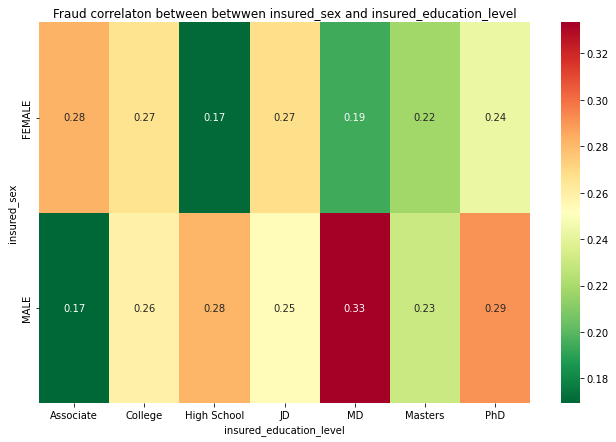

insured_occupation,adm-clerical,armed-forces,craft-repair,exec-managerial,farming-fishing,handlers-cleaners,machine-op-inspct,other-service,priv-house-serv,prof-specialty,protective-serv,sales,tech-support,transport-moving
insured_sex,,,,,,,,,,,,,,
FEMALE,0.131579,0.257143,0.285714,0.324324,0.16129,0.206897,0.204545,0.162162,0.236842,0.212766,0.205882,0.261905,0.288889,0.315789
MALE,0.222222,0.235294,0.312500,0.410256,0.50000,0.200000,0.270833,0.176471,0.090909,0.210526,0.241379,0.294118,0.272727,0.264706


In [111]:
plt.figure(figsize=[11,7])
sns.heatmap(claim_sex_edu,annot=True,cmap='RdYlGn_r')
plt.title("Fraud correlaton between betwwen insured_sex and insured_education_level")
plt.show()

claim_sex_ocu=pd.pivot_table(data=insurance_claim,index='insured_sex',columns='insured_occupation',values='fraud_flag')
claim_sex_ocu

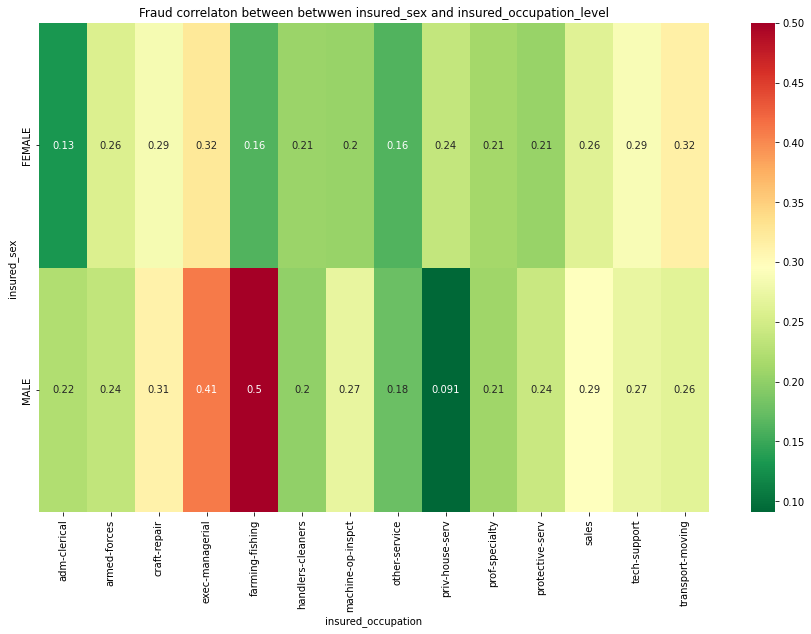

insured_occupation,adm-clerical,armed-forces,craft-repair,exec-managerial,farming-fishing,handlers-cleaners,machine-op-inspct,other-service,priv-house-serv,prof-specialty,protective-serv,sales,tech-support,transport-moving
insured_education_level,,,,,,,,,,,,,,
Associate,0.142857,0.181818,0.200000,0.600000,0.000000,0.125000,0.250000,0.285714,0.133333,0.307692,0.500000,0.133333,0.187500,0.600000
College,0.300000,0.285714,0.250000,0.625000,0.375000,0.250000,0.250000,0.250000,0.333333,0.166667,0.285714,0.222222,0.142857,0.100000
High School,0.272727,0.181818,0.454545,0.333333,0.333333,0.181818,0.117647,0.000000,0.000000,0.100000,0.100000,0.230769,0.333333,0.333333
JD,0.125000,0.300000,0.400000,0.384615,0.416667,0.375000,0.142857,0.166667,0.181818,0.000000,0.090909,0.250000,0.428571,0.250000
MD,0.000000,0.444444,0.333333,0.250000,0.428571,0.000000,0.363636,0.166667,0.230769,0.230769,0.181818,0.500000,0.214286,0.200000
Masters,0.111111,0.222222,0.000000,0.272727,0.111111,0.125000,0.235294,0.200000,0.100000,0.444444,0.250000,0.333333,0.142857,0.357143
PhD,0.333333,0.166667,0.230769,0.333333,0.142857,0.222222,0.312500,0.083333,0.285714,0.300000,0.250000,0.400000,0.500000,0.300000


In [112]:
plt.figure(figsize=[15,9])
sns.heatmap(claim_sex_ocu,annot=True,cmap='RdYlGn_r')
plt.title("Fraud correlaton between betwwen insured_sex and insured_occupation_level")
plt.show()

claim_edu_ocu=pd.pivot_table(data=insurance_claim,index='insured_education_level',columns='insured_occupation',values='fraud_flag')
claim_edu_ocu

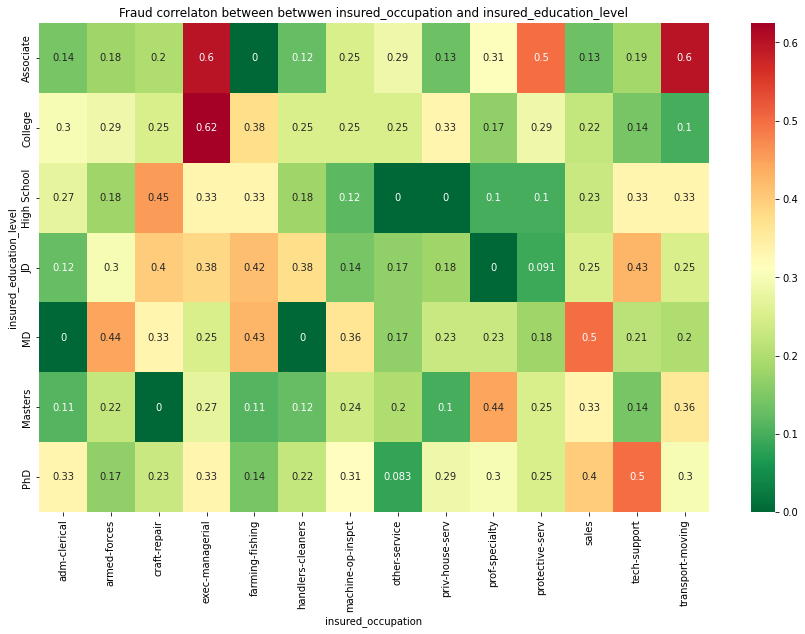

In [113]:
plt.figure(figsize=[15,9])
sns.heatmap(claim_edu_ocu,annot=True,cmap='RdYlGn_r')
plt.title("Fraud correlaton between betwwen insured_occupation and insured_education_level")
plt.show()